<a href="https://www.kaggle.com/code/zerol0l/titanic-survival-prediction?scriptVersionId=236907673" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Titanic Survival Predictions (Beginner)

I am a newbie to data science and machine learning, and will be attempting to work my way through the Titanic: Machine Learning from Disaster dataset. Please consider upvoting if this is useful to you! :)

----------------

### Introduction:

This notebook offers a simple and practical introduction to ensembling techniques, with a focus on a powerful approach known as Stacking. In essence, stacking works by combining the predictions of several base models (first-level learners) and feeding them into a second-level model (often called a meta-learner), which then makes the final prediction.

The Titanic dataset is a great choice for exploring this concept, especially since it’s where many Kaggle users begin their machine learning journey. While stacking has played a key role in many winning competition entries, resources explaining it in a beginner-friendly way are surprisingly limited. This notebook aims to bridge that gap and provide a solid starting point for anyone looking to learn and apply stacking in practice.


------------

### Table of Content:
The competition solution workflow goes through seven stages described in the Data Science Solutions book.

1. Question or problem definition.
2. Import Necessary Libraries, Read in & Explore the Data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Submit the results.

----------

  <div style="background-color: #e7f3fe; 
            padding: 20px; 
            font: bold 30px Arial; 
            color: #31708f; 
            border: 2px solid #bce8f1; 
            border-radius: 8px;">
Question or Problem definition:
</div>


Platforms like Kaggle provide structured challenges where the problem is clearly defined and relevant datasets are supplied. These competitions allow you to build data science models, train them on the provided data, and evaluate their performance on a separate test set.

In the Titanic: Machine Learning from Disaster competition, the task is to predict which passengers survived the Titanic tragedy based on their personal and demographic information. You’re given a training dataset that includes survival outcomes and a test dataset where the outcomes are hidden—your model’s job is to make those predictions.

Before we jump into modeling, it helps to understand the context of the problem. Here are some key details, summarized from the competition description:

- On April 15, 1912, the Titanic sank after striking an iceberg on its maiden voyage. Out of 2,224 passengers and crew, 1,502 died—only about 32% survived.

- A significant reason for the high death toll was the lack of enough lifeboats for everyone on board.

- While survival had an element of chance, certain groups had higher survival rates—especially women, children, and passengers in higher social classes.

  <div style="background-color: #e7f3fe; 
            padding: 20px; 
            font: bold 30px Arial; 
            color: #31708f; 
            border: 2px solid #bce8f1; 
            border-radius: 8px;">
Import Necessary Libraries, Read in & Explore the Data:
</div>

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Acquire Data:
The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together

In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv') 
test_df = pd.read_csv('/kaggle/input/titanic/test.csv') 
gender_submission_df = pd.read_csv('/kaggle/input/titanic/gender_submission.csv') 

### Analyze Data:

In [3]:
#get a list of the features within the dataset
print(train_df.columns.values)
print(test_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [4]:
# preview the datasets
train_df.head()
test_df.head()

#see a summary of the training dataset
train_df.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Some Observstions:

- Names are unique across the dataset (count=unique=891)
- Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
- Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
- Embarked takes three possible values. S port used by most passengers (top=S)
- Ticket feature has high ratio (22%) of duplicate values (unique=681).

### Analyzing Feature Correlations with Pivot Tables

To validate some of our initial observations and assumptions, we can perform a quick analysis by pivoting features against the target variable. At this point, we’ll focus only on features that have no missing values and are either categorical (e.g., Sex), ordinal (e.g., Pclass), or discrete (e.g., SibSp, Parch).

- Pclass: There is a strong correlation between Pclass=1 and survival, with a correlation coefficient greater than 0.5. This suggests that passengers in first class had significantly higher survival rates, so we’ll keep this feature in our model.

- Sex: As we noted during the problem definition, Sex=female is strongly associated with survival—about 74% of female passengers survived. This makes it a very important feature to include.

- SibSp and Parch: These features show little to no correlation with survival for certain values, which suggests they may not be very predictive on their own. It might be more effective to engineer a new feature by combining them—for example, a "family size" feature.

In [5]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [6]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [7]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [8]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


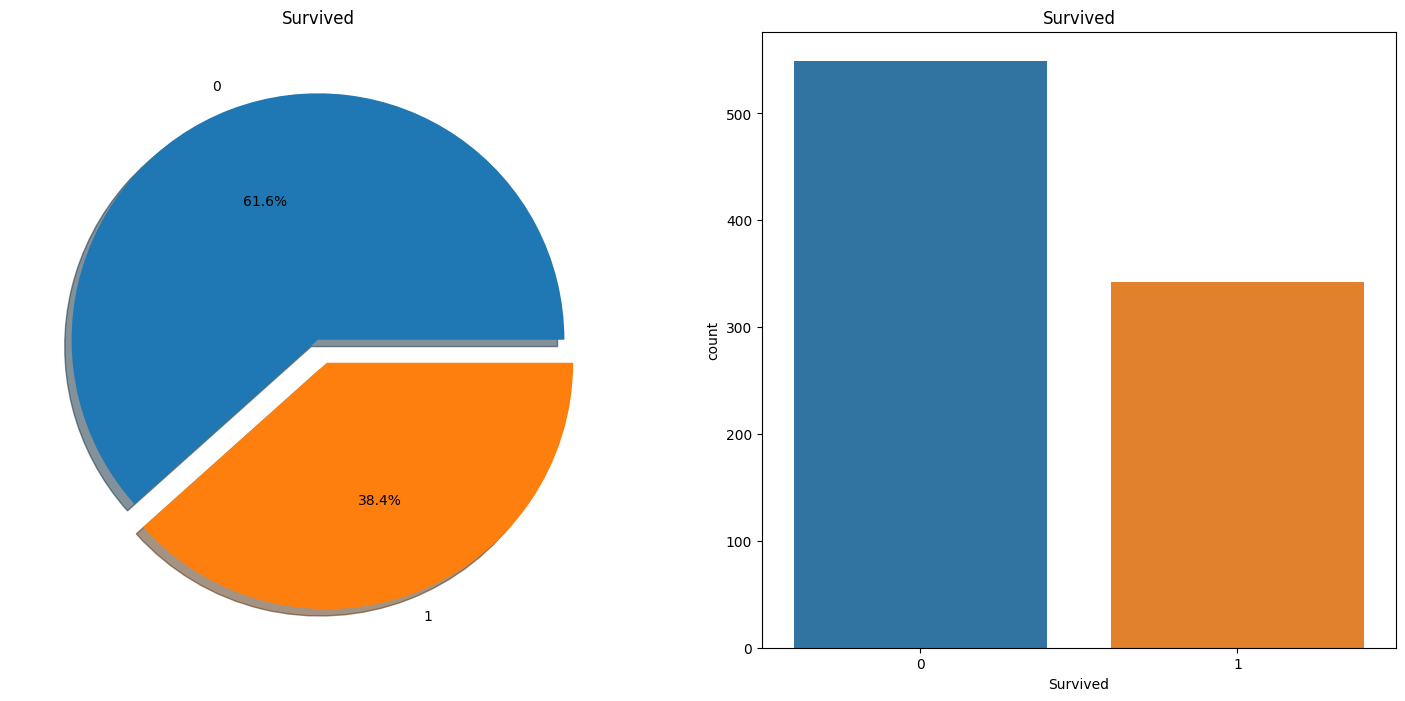

In [9]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart of survival percentages
train_df['Survived'].value_counts().plot.pie(
    explode=[0, 0.1],
    autopct='%1.1f%%',
    ax=ax[0],
    shadow=True
)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

# Bar chart of survival counts
sns.countplot(x='Survived', data=train_df, ax=ax[1])
ax[1].set_title('Survived')

plt.show()

It's clear that a relatively small number of passengers survived the Titanic disaster.

Out of the 891 passengers in the training dataset, only about 350 survived—just 38.4%. To gain deeper insights, we need to explore the data further and identify which groups of passengers were more likely to survive and which were not.

We'll analyze survival rates across various features in the dataset, such as Sex, Port of Embarkation, Age, and others, to better understand the patterns and factors that influenced survival.

### Features Analysis: ([Gender/Sex], Pclass, Age, Embarked, etc)

#### Gender/Sex

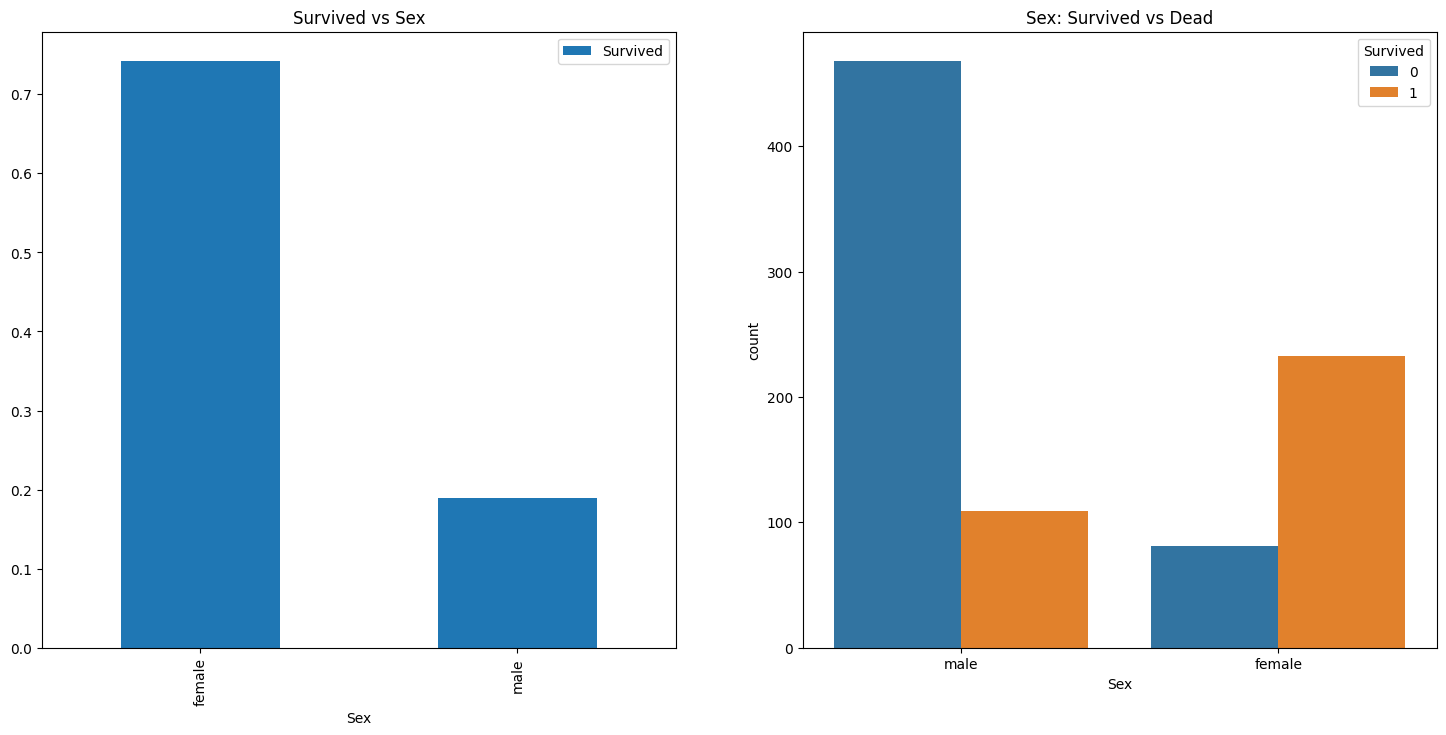

In [10]:
# Grouping data to count Survived by Sex
train_df.groupby(['Sex', 'Survived'])['Survived'].count()

# Plotting
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Bar plot showing mean survival rate by Sex
train_df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

# Count plot showing the distribution of Sex and Survived (with hue for Survived)
sns.countplot(x='Sex', hue='Survived', data=train_df, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

# Display the plots
plt.show()

This is quite an interesting observation. Although there were significantly more men on board than women, the number of women who survived was nearly double that of the men who survived. The survival rate for women was around 75%, compared to just 18–19% for men.



### Pclass

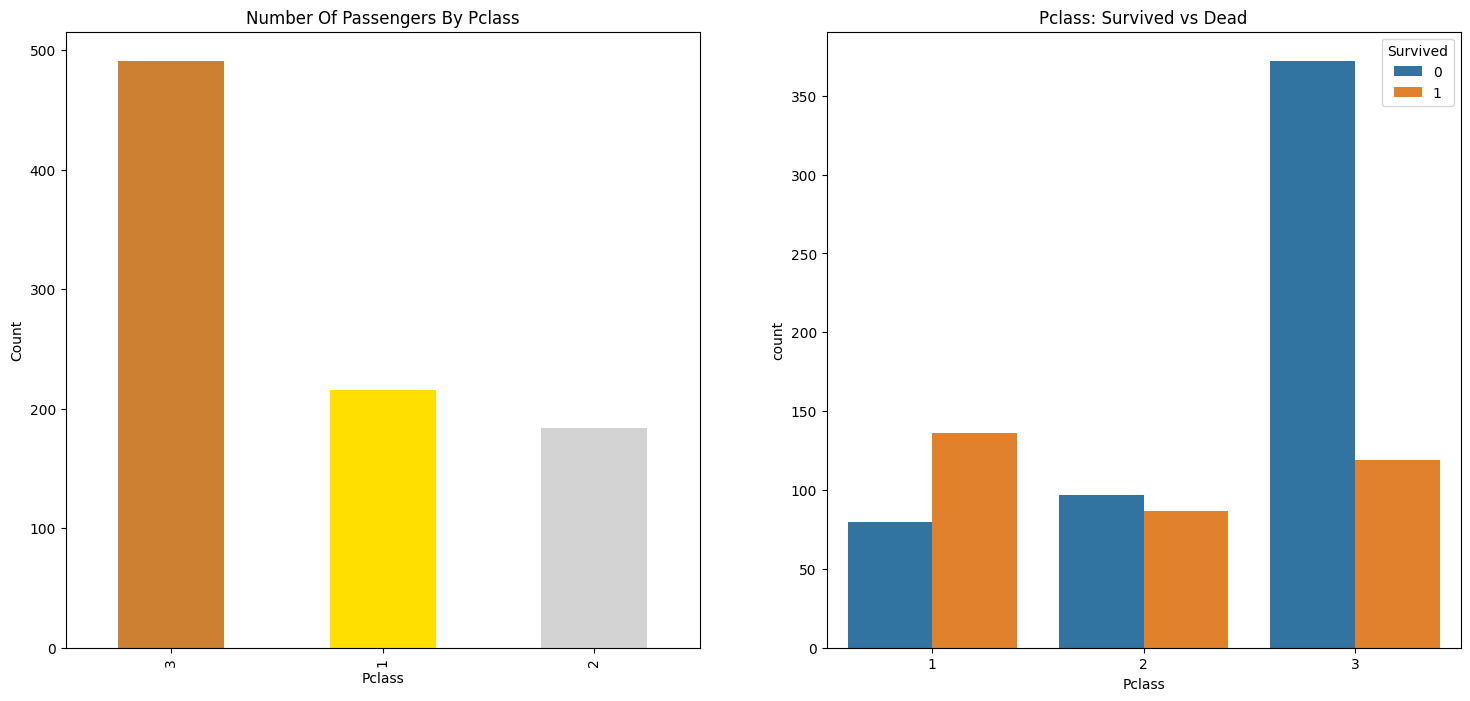

In [11]:
# Cross-tabulation of Pclass vs Survived with margins
pd.crosstab(train_df.Pclass, train_df.Survived, margins=True).style.background_gradient(cmap='summer_r')

# Plotting
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Bar plot showing the number of passengers by Pclass
train_df['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

# Count plot showing the distribution of Pclass and Survived
sns.countplot(x='Pclass', hue='Survived', data=train_df, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')

# Show the plots
plt.show()

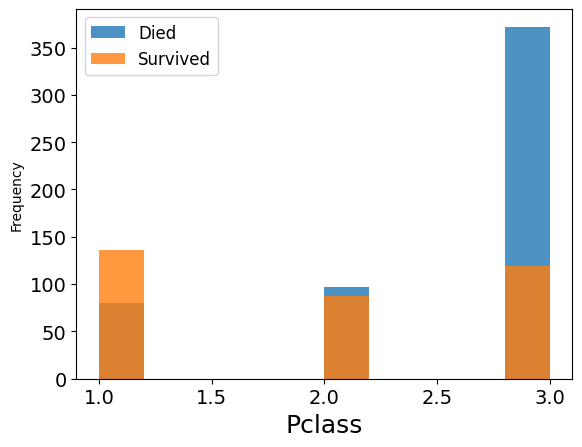

In [12]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

plt.figure()
fig = train_df.groupby('Survived')['Pclass'].plot.hist(histtype= 'bar', alpha = 0.8)
plt.legend(('Died','Survived'), fontsize = 12)
plt.xlabel('Pclass', fontsize = 18)
plt.show()

Observations:
People often say *“Money can’t buy everything,”* but the Titanic data tells a different story—at least when it comes to survival. Passengers in **1st class** were clearly given higher priority during the rescue efforts. Despite having a much larger number of passengers, **3rd class** had a significantly lower survival rate—only around 25%.

In comparison, the survival rate for **1st class** passengers was about **63%**, and for 2nd class, it was roughly **48%**. It’s clear that **wealth and social status** played a major role. A harsh reminder of how material things can matter in critical situations.


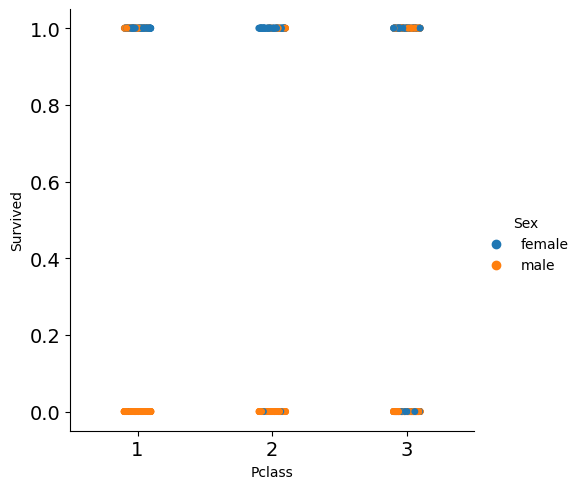

In [13]:
# Cross-tabulation of Sex, Survived vs Pclass with margins
pd.crosstab([train_df.Sex, train_df.Survived], train_df.Pclass, margins=True).style.background_gradient(cmap='summer_r')

# Plotting the categorical plot for Pclass vs Survived with hue for Sex
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=train_df)

# Display the plot
plt.show()

Observations:
We use a **FactorPlot** in this case because it clearly separates and visualizes categorical variables, making it easier to interpret survival patterns across different groups.

From the **crosstab** and **FactorPlot**, we can clearly see that the survival rate for women in **Pclass 1** is extremely high—around **95–96%**. Out of 94 women in 1st class, only 3 did not survive.

It’s evident that women **were given top priority during the rescue**, regardless of their class. Interestingly, even men in 1st class had a relatively low survival rate compared to women. This further confirms that **Pclass** is a strong predictor of survival.

### Age

In [14]:
data = [train_df, test_df]
for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

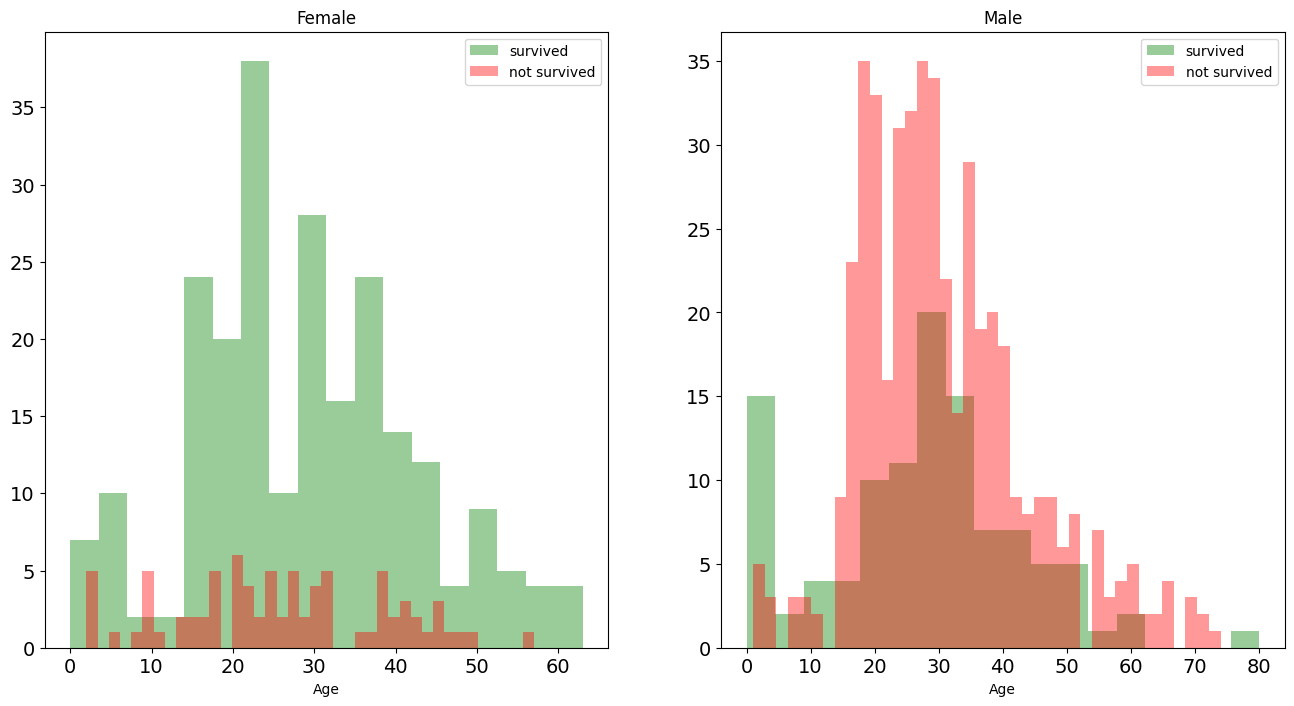

In [15]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 8))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False, color="green")
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False, color="red")
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False, color="green")
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False, color="red")
ax.legend()
_ = ax.set_title('Male');

In [16]:
print('Oldest Passenger was of:',train_df['Age'].max(),'Years')
print('Youngest Passenger was of:',train_df['Age'].min(),'Years')
print('Average Age on the ship:',train_df['Age'].mean(),'Years')

Oldest Passenger was of: 80 Years
Youngest Passenger was of: 0 Years
Average Age on the ship: 29.39057239057239 Years


### Embarked

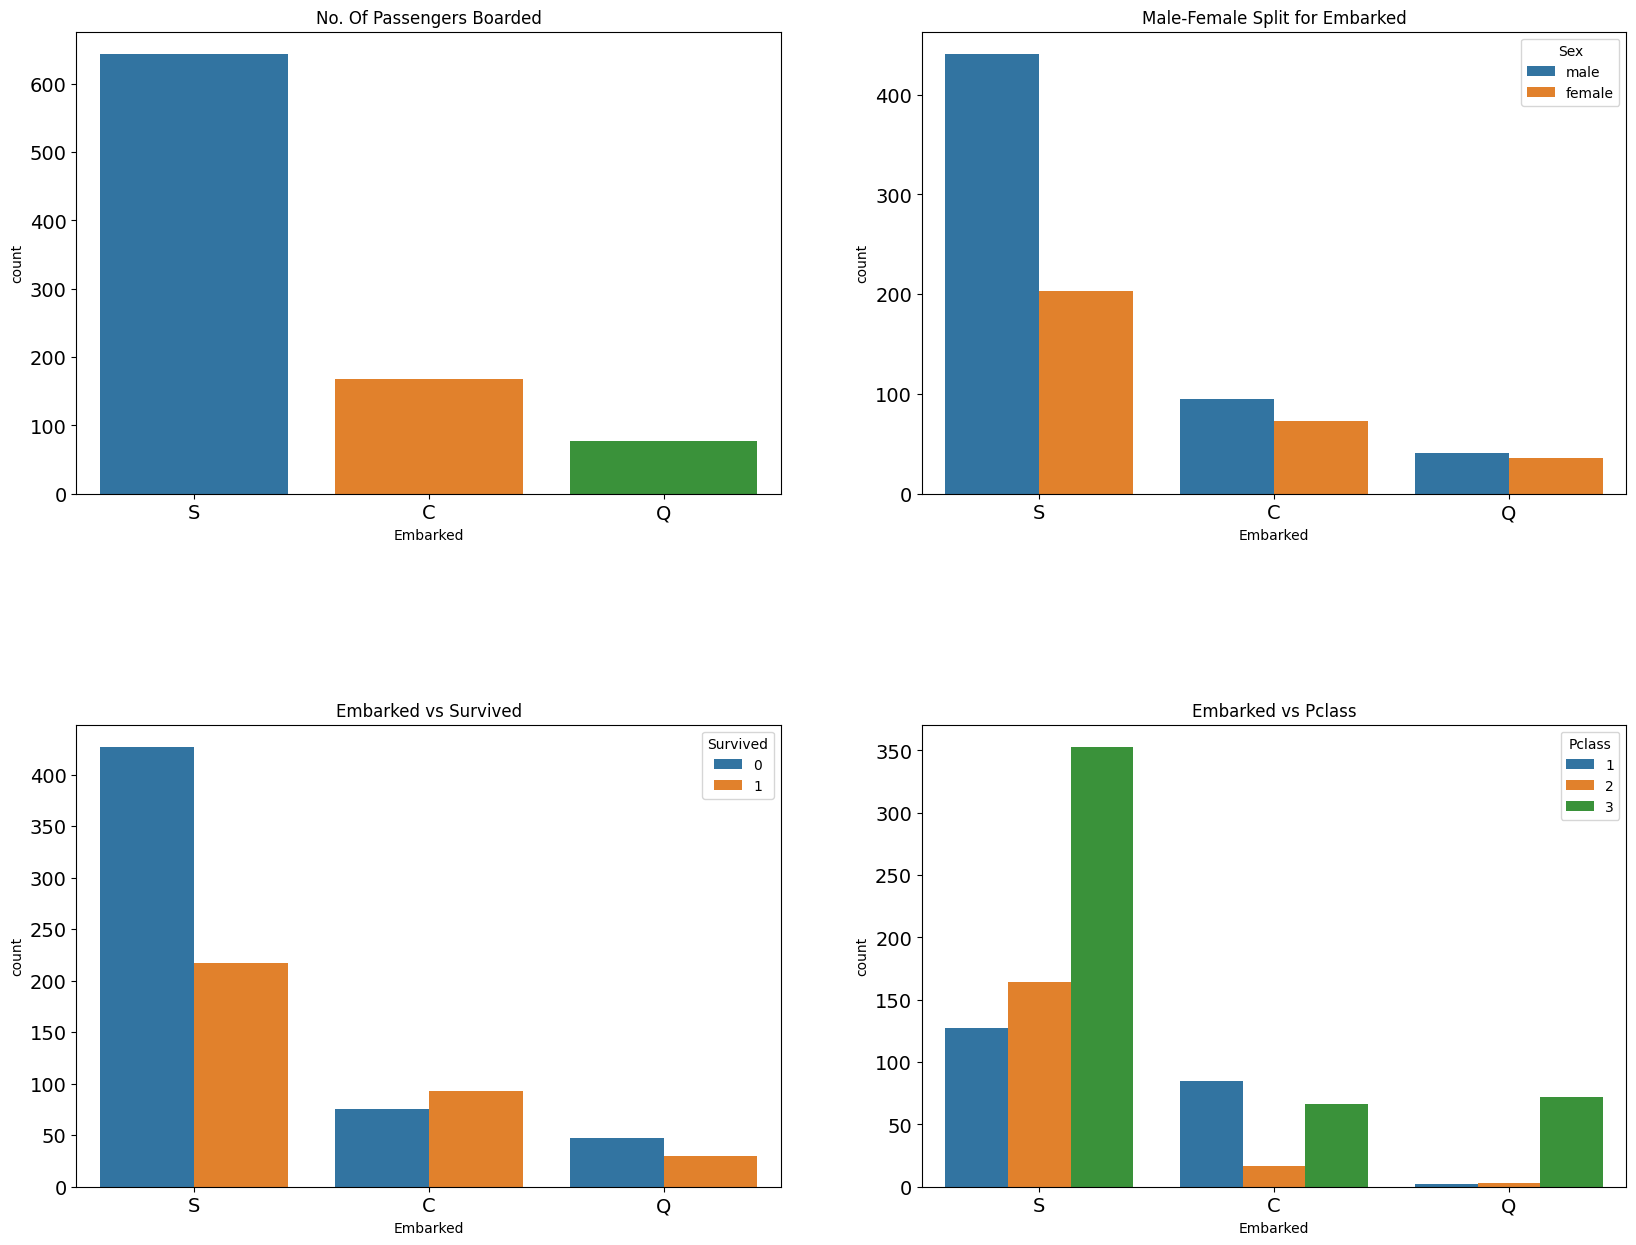

In [17]:
# Cross-tabulation of Embarked vs Pclass and Sex, Survived with margins
pd.crosstab([train_df.Embarked, train_df.Pclass], [train_df.Sex, train_df.Survived], margins=True).style.background_gradient(cmap='summer_r')

# Plotting the countplots in a 2x2 grid
f, ax = plt.subplots(2, 2, figsize=(20, 15))

# No. of passengers boarded by Embarked location
sns.countplot(x='Embarked', data=train_df, ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')

# Male-Female split for Embarked
sns.countplot(x='Embarked', hue='Sex', data=train_df, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')

# Embarked vs Survived
sns.countplot(x='Embarked', hue='Survived', data=train_df, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')

# Embarked vs Pclass
sns.countplot(x='Embarked', hue='Pclass', data=train_df, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')

# Adjusting the space between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.5)

# Display the plots
plt.show()

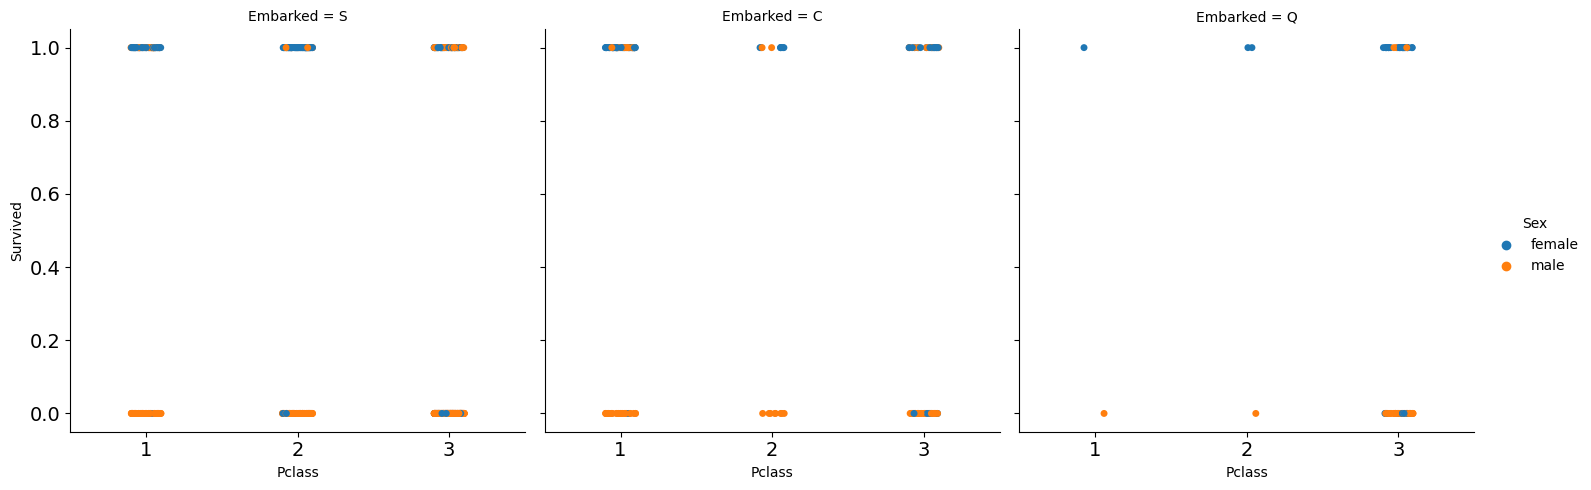

In [18]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train_df)

# Display the plot
plt.show()

#### Key Observatoins:
1. **High Survival for Women in Upper Classes**:
Women from **Pclass 1** and **Pclass 2** had an extremely high survival rate—almost 100%—regardless of their class. Gender clearly played a significant role in survival, especially when combined with higher class.
2. **Port S Unfavorable for Pclass 3**:
**Southampton (Port S)** appears to have been particularly unfortunate for **Pclass 3** passengers. Survival rates for both men and women boarding there in 3rd class were very low—once again highlighting the impact of wealth and status.
3. **Port Q Especially Unlucky for Men**:
**Queenstown (Port Q)** seems to have been the worst for **male passengers**, as nearly all of them were in **Pclass 3**, and survival rates were dismal.

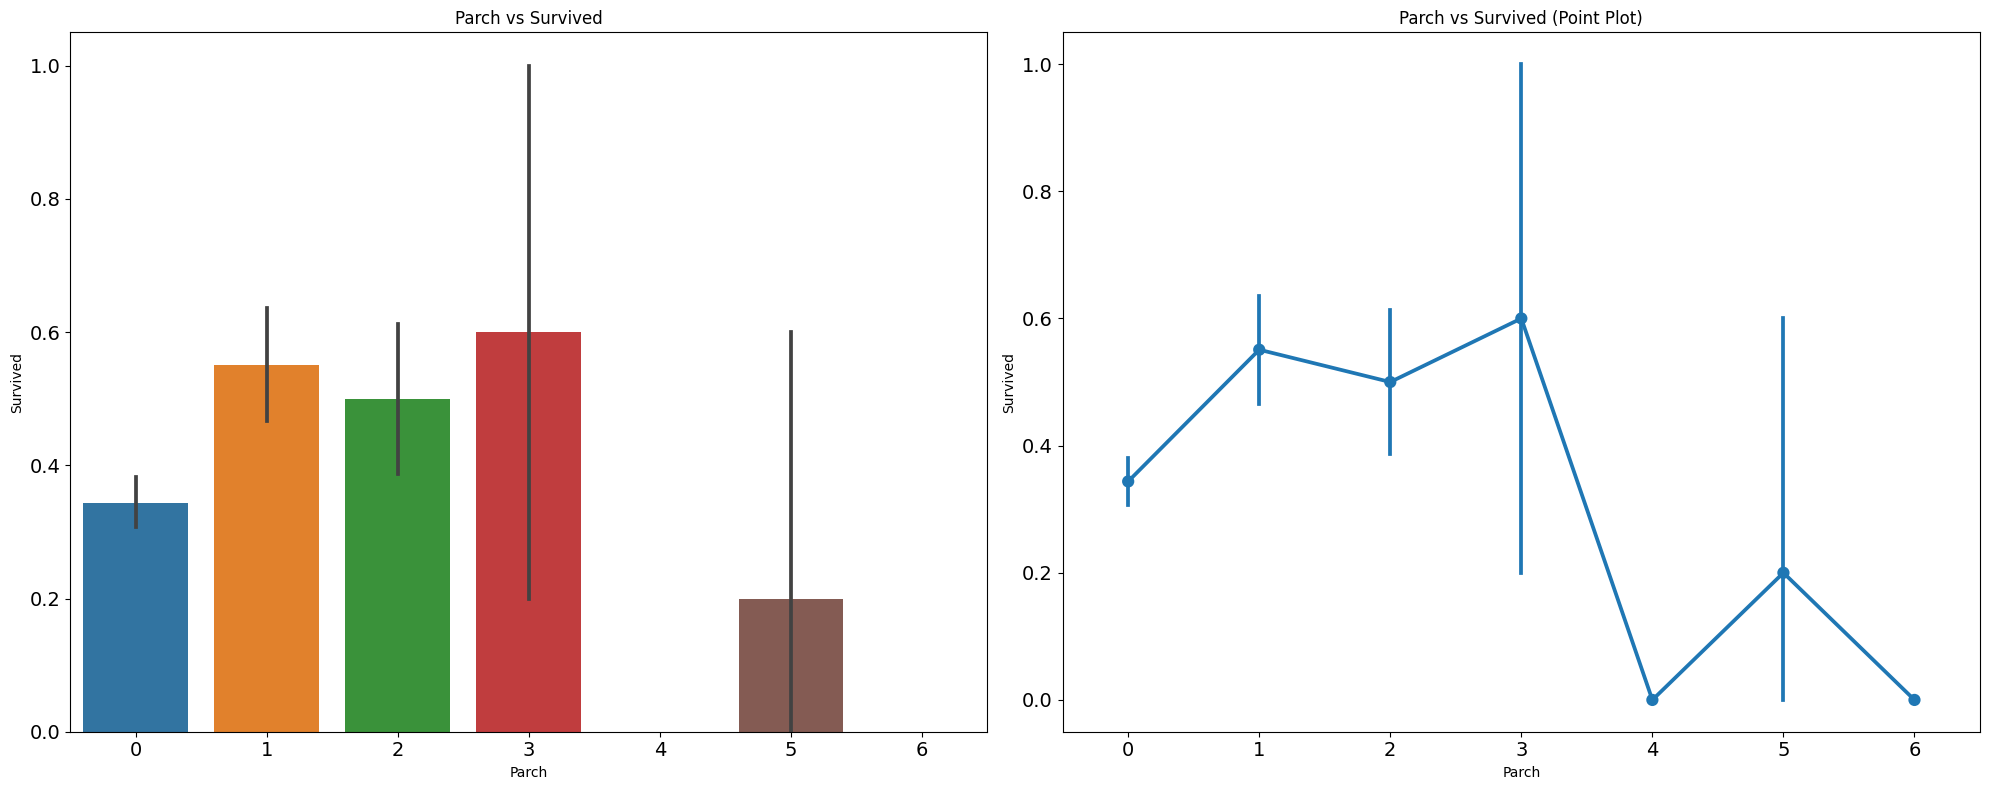

In [19]:
# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Bar plot: Parch vs Survived
sns.barplot(x='Parch', y='Survived', data=train_df, ax=ax[0])
ax[0].set_title('Parch vs Survived')

# Point plot: Parch vs Survived
sns.pointplot(x='Parch', y='Survived', data=train_df, ax=ax[1])
ax[1].set_title('Parch vs Survived (Point Plot)')

plt.tight_layout()
plt.show()

### Summary of Key Observations by Features
**Sex**:
Women had a significantly higher survival rate than men. Gender was one of the most influential factors in determining survival.

**Pclass**:
There’s a clear trend showing that passengers in **1st class** had much better chances of survival. Those in **3rd class** had the lowest survival rate. Among women, nearly all from **1st class** survived, and survival was also relatively high for **2nd class**. Money, it seems, did make a difference.

**Age**:
Children under the age of **5–10** had a notably higher chance of survival. In contrast, a large number of passengers aged **15 to 35** did not survive.

**Embarked**:
The port of embarkation also appears to influence survival. Passengers who boarded at Cherbourg (C) had a higher survival rate, even though the majority of **1st class** passengers boarded at **Southampton (S)**. Interestingly, passengers who boarded at **Queenstown (Q)** were mostly from **3rd class**, which may explain their lower survival rates.

**Parch + SibSp (Family Size)**:
Passengers with a small family group—**1–2 siblings/spouses** or **1–3 parents/children**—had better chances of survival compared to those traveling alone or with large families.

### Correllation between Features:

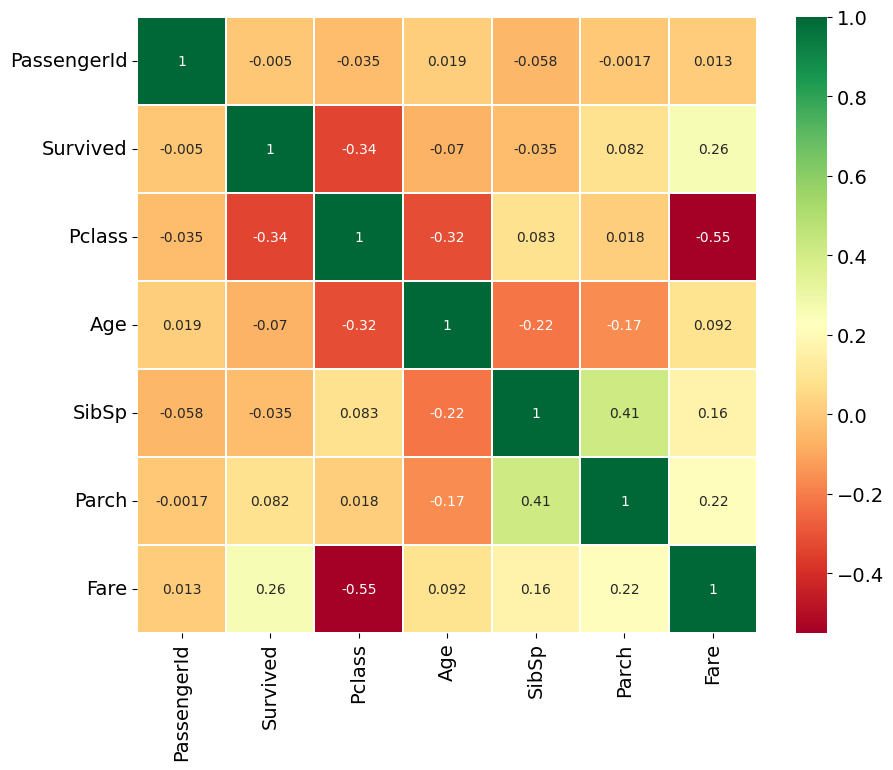

In [20]:
# Only use numeric columns
numeric_df = train_df.select_dtypes(include='number')

# Plot correlation heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)

# Resize the figure
fig = plt.gcf()
fig.set_size_inches(10, 8)

plt.show()

#### Interpreting the Heatmap
The heatmap helps us visualize correlations between numerical features in our dataset. Since correlation is a mathematical relationship, only numeric columns are included—categorical features like strings or labels can't be directly correlated.

Before diving into the interpretation, let’s briefly review what correlation means:

* **Positive Correlation**:
When an increase in one feature leads to an increase in another, the two are said to be positively correlated. A correlation value of +1 indicates a perfect positive relationship.

* **Negative Correlation**:
When an increase in one feature leads to a decrease in another, this indicates a negative correlation. A value of -1 means perfect negative correlation.

By analyzing the heatmap, we can identify which features are most strongly related to the target variable (Survived) and to each other—insights that can guide feature selection and engineering.

  <div style="background-color: #e7f3fe; 
            padding: 20px; 
            font: bold 30px Arial; 
            color: #31708f; 
            border: 2px solid #bce8f1; 
            border-radius: 8px;">
Cleanse Data/Analyze: Identify patterns, & Explore the data
</div>

#### Based on early analysis we obserseved the following:

* **Name**:
All names in the dataset are unique, with the total count matching the number of unique entries (891). This feature isn’t useful for modeling but could be helpful for extracting titles or family names.

* **Gender/Sex**:
The Sex feature has two categories: male and female. About 65% of the passengers are male (male is the most frequent value with 577 occurrences out of 891).

* **Cabin**:
Many Cabin values are duplicated, suggesting that some passengers shared cabins. However, a large portion of this feature also contains missing values, which reduces its reliability.

* **Embarked**:
The Embarked feature has three possible values (C, Q, and S), with S (Southampton) being the most common port of embarkation.

* **Ticket**:
The Ticket feature shows a high number of duplicates—only 681 unique values among 891 entries, meaning about 22% of the tickets are shared by multiple passengers (likely groups or families).

In [21]:
# Load train and test datasets
train = pd.read_csv('/kaggle/input/titanic/train.csv')  # Replace with the correct path to your train data
test = pd.read_csv('/kaggle/input/titanic/test.csv')    # Replace with the correct path to your test data

# Now drop 'Cabin' columns
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

In [22]:
#we can also drop the Ticket feature since it's unlikely to yield any useful information
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [23]:
#now we need to fill in the missing values in the Embarked feature
print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [24]:
#create a combined group of both datasets
combine = [train, test]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [25]:
#replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [26]:
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [27]:
print(train.columns)  # Check the column names in the train DataFrame
print(test.columns)   # Check the column names in the test DataFrame

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'Title'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')


In [28]:
# Define the bins and labels for age groups
bins = [0, 12, 18, 35, 60, 120]  # Age ranges: child, teen, young adult, adult, senior
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

# Create the 'AgeGroup' column
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels)
test['AgeGroup'] = pd.cut(test['Age'], bins=bins, labels=labels)

# Fill missing AgeGroup using Title mapping
age_title_mapping = {
    1: "Young Adult",  # Mr
    2: "Student",      # Miss
    3: "Adult",        # Mrs
    4: "Child",        # Master
    5: "Adult",        # Royal
    6: "Adult"         # Rare
}

# Where AgeGroup is missing, map it from Title
train['AgeGroup'] = train.apply(
    lambda row: age_title_mapping[row['Title']] if pd.isnull(row['AgeGroup']) else row['AgeGroup'],
    axis=1
)
test['AgeGroup'] = test.apply(
    lambda row: age_title_mapping[row['Title']] if pd.isnull(row['AgeGroup']) else row['AgeGroup'],
    axis=1
)

# Verify the result
print(train['AgeGroup'].value_counts(dropna=False))
print(test['AgeGroup'].value_counts(dropna=False))

AgeGroup
Young Adult    477
Adult          213
Child           73
Teen            70
Student         36
Senior          22
Name: count, dtype: int64
AgeGroup
Young Adult    230
Adult          104
Teen            29
Child           29
Student         15
Senior          11
Name: count, dtype: int64


In [29]:
age_mapping = {
    'Child': 1,
    'Teen': 2,
    'Young Adult': 3,
    'Adult': 4,
    'Senior': 5
}

In [30]:
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

In [31]:
age_mapping = {
    'Baby': 1,
    'Child': 2,
    'Teen': 3,
    'Student': 4,
    'Young Adult': 5,
    'Adult': 6,
    'Senior': 7
}

In [32]:
train = train.drop(['Age'], axis=1, errors='ignore')
test = test.drop(['Age'], axis=1, errors='ignore')

In [33]:
#drop the name feature since it contains no more useful information.
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [34]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,1,0,3,0,1,0,7.2500,S,1,3.0
1,2,1,1,1,1,0,71.2833,C,3,4.0
2,3,1,3,1,0,0,7.9250,S,2,3.0
3,4,1,1,1,1,0,53.1000,S,3,3.0
4,5,0,3,0,0,0,8.0500,S,1,3.0


In [35]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,1,0,3,0,1,0,7.2500,1.0,1,3.0
1,2,1,1,1,1,0,71.2833,2.0,3,4.0
2,3,1,3,1,0,0,7.9250,1.0,2,3.0
3,4,1,1,1,1,0,53.1000,1.0,3,3.0
4,5,0,3,0,0,0,8.0500,1.0,1,3.0


In [36]:
#fill in missing Fare value in test set based on mean fare for that Pclass 
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
        
#map Fare values into groups of numerical values
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [37]:
#check train data
train.head()

#check test data
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeGroup,FareBand
0,892,3,0,0,0,3,1,3.0,1
1,893,3,1,1,0,1,3,4.0,1
2,894,2,0,0,0,3,1,5.0,2
3,895,3,0,0,0,1,1,3.0,2
4,896,3,1,1,1,1,3,3.0,2


  <div style="background-color: #e7f3fe; 
            padding: 20px; 
            font: bold 30px Arial; 
            color: #31708f; 
            border: 2px solid #bce8f1; 
            border-radius: 8px;">
Model, predict and solve the problem
</div>

In [38]:
predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [39]:
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

imputer = SimpleImputer(strategy='most_frequent')
x_train_imputed = imputer.fit_transform(x_train)
x_val_imputed = imputer.transform(x_val)

gaussian = GaussianNB()
gaussian.fit(x_train_imputed, y_train)
y_pred = gaussian.predict(x_val_imputed)

acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Accuracy:", acc_gaussian, "%")

Accuracy: 78.68 %


In [40]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Impute missing values
imputer = SimpleImputer(strategy='most_frequent')  # or 'mean' for numerical data
x_train_imputed = imputer.fit_transform(x_train)
x_val_imputed = imputer.transform(x_val)

# Step 2: Train the model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train_imputed, y_train)

# Step 3: Predict and evaluate
y_pred = logreg.predict(x_val_imputed)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)

print("Logistic Regression Accuracy:", acc_logreg, "%")

Logistic Regression Accuracy: 79.19 %


In [41]:
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Create pipeline: Imputer + SVC
svc_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handles NaNs
    ('svc', SVC())  # The classifier
])

# Fit on training data
svc_pipeline.fit(x_train, y_train)

# Predict on validation data
y_pred = svc_pipeline.predict(x_val)

# Evaluate accuracy
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print("SVC Accuracy:", acc_svc, "%")

SVC Accuracy: 82.23 %


In [42]:
from sklearn.impute import SimpleImputer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Step 1: Create the pipeline with imputation + LinearSVC
linear_svc_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with the most frequent value
    ('linear_svc', LinearSVC(max_iter=10000))  # Linear SVC (increased max_iter for convergence)
])

# Step 2: Fit the pipeline
linear_svc_pipeline.fit(x_train, y_train)

# Step 3: Predict and evaluate
y_pred = linear_svc_pipeline.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)

# Step 4: Print the accuracy
print("Linear SVC Accuracy:", acc_linear_svc, "%")

Linear SVC Accuracy: 78.17 %


In [43]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Step 1: Check if there are any NaN values in x_train and x_val
print("Training data NaN count:", x_train.isnull().sum())
print("Validation data NaN count:", x_val.isnull().sum())

# Step 2: Create a pipeline with imputation + Perceptron
perceptron_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values
    ('perceptron', Perceptron())  # Perceptron model
])

# Step 3: Fit the pipeline on the training data
perceptron_pipeline.fit(x_train, y_train)

# Step 4: Predict and evaluate
y_pred = perceptron_pipeline.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)

# Step 5: Print accuracy
print("Perceptron Accuracy:", acc_perceptron, "%")

# Step 6: Verify if imputation worked (after imputation)
print("Training data NaN count after imputation:", x_train.isnull().sum())
print("Validation data NaN count after imputation:", x_val.isnull().sum())

Training data NaN count: Pclass       0
Sex          0
SibSp        0
Parch        0
Embarked     2
Title        0
AgeGroup    30
FareBand     0
dtype: int64
Validation data NaN count: Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
Title       0
AgeGroup    6
FareBand    0
dtype: int64
Perceptron Accuracy: 79.7 %
Training data NaN count after imputation: Pclass       0
Sex          0
SibSp        0
Parch        0
Embarked     2
Title        0
AgeGroup    30
FareBand     0
dtype: int64
Validation data NaN count after imputation: Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
Title       0
AgeGroup    6
FareBand    0
dtype: int64


In [44]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Step 1: Check for NaN values in x_train and x_val before imputation
print("Training data NaN count before imputation:", x_train.isnull().sum())
print("Validation data NaN count before imputation:", x_val.isnull().sum())

# Step 2: Create a pipeline with imputation + DecisionTree
decisiontree_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values
    ('decisiontree', DecisionTreeClassifier())  # DecisionTree model
])

# Step 3: Fit the model
decisiontree_pipeline.fit(x_train, y_train)

# Step 4: Predict and evaluate
y_pred = decisiontree_pipeline.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)

# Step 5: Print the accuracy
print("Decision Tree Accuracy:", acc_decisiontree, "%")

# Step 6: Check if there are NaN values after imputation
print("Training data NaN count after imputation:", x_train.isnull().sum())
print("Validation data NaN count after imputation:", x_val.isnull().sum())

Training data NaN count before imputation: Pclass       0
Sex          0
SibSp        0
Parch        0
Embarked     2
Title        0
AgeGroup    30
FareBand     0
dtype: int64
Validation data NaN count before imputation: Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
Title       0
AgeGroup    6
FareBand    0
dtype: int64
Decision Tree Accuracy: 82.23 %
Training data NaN count after imputation: Pclass       0
Sex          0
SibSp        0
Parch        0
Embarked     2
Title        0
AgeGroup    30
FareBand     0
dtype: int64
Validation data NaN count after imputation: Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
Title       0
AgeGroup    6
FareBand    0
dtype: int64


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Step 1: Check for NaN values in the training and validation datasets before fitting the model
print("NaN values in x_train before imputation:", x_train.isnull().sum())
print("NaN values in x_val before imputation:", x_val.isnull().sum())

# Step 2: Create a pipeline with imputation + RandomForestClassifier
randomforest_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values
    ('randomforest', RandomForestClassifier())  # Random Forest Classifier model
])

# Step 3: Fit the model
randomforest_pipeline.fit(x_train, y_train)

# Step 4: Predict and evaluate
y_pred = randomforest_pipeline.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)

# Step 5: Print the accuracy
print("Random Forest Accuracy:", acc_randomforest, "%")

# Step 6: Verify if NaN values are removed after imputation
print("NaN values in x_train after imputation:", x_train.isnull().sum())
print("NaN values in x_val after imputation:", x_val.isnull().sum())

NaN values in x_train before imputation: Pclass       0
Sex          0
SibSp        0
Parch        0
Embarked     2
Title        0
AgeGroup    30
FareBand     0
dtype: int64
NaN values in x_val before imputation: Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
Title       0
AgeGroup    6
FareBand    0
dtype: int64
Random Forest Accuracy: 82.74 %
NaN values in x_train after imputation: Pclass       0
Sex          0
SibSp        0
Parch        0
Embarked     2
Title        0
AgeGroup    30
FareBand     0
dtype: int64
NaN values in x_val after imputation: Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
Title       0
AgeGroup    6
FareBand    0
dtype: int64


In [46]:
from sklearn.impute import SimpleImputer

# Create the imputer to fill NaN values with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')

# Apply imputer to both training and validation data
x_train_imputed = imputer.fit_transform(x_train)
x_val_imputed = imputer.transform(x_val)

# Train the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(x_train_imputed, y_train)

# Make predictions and calculate accuracy
y_pred = knn.predict(x_val_imputed)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)

print("KNN Accuracy:", acc_knn, "%")

KNN Accuracy: 82.74 %


In [47]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the SGD classifier
sgd = SGDClassifier()
sgd.fit(x_train_imputed, y_train)

# Make predictions and calculate accuracy
y_pred = sgd.predict(x_val_imputed)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)

print("SGD Accuracy: ", acc_sgd, "%")

SGD Accuracy:  80.2 %


In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the Gradient Boosting Classifier
gbk = GradientBoostingClassifier()
gbk.fit(x_train_imputed, y_train)

# Make predictions and calculate accuracy
y_pred = gbk.predict(x_val_imputed)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)

print(f"Gradient Boosting Classifier Accuracy: {acc_gbk}%")

Gradient Boosting Classifier Accuracy: 83.25%


#### Comparing the Accuracies of each Model

In [49]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
9,Gradient Boosting Classifier,83.25
1,KNN,82.74
3,Random Forest,82.74
0,Support Vector Machines,82.23
7,Decision Tree,82.23
8,Stochastic Gradient Descent,80.20
5,Perceptron,79.70
2,Logistic Regression,79.19
4,Naive Bayes,78.68
6,Linear SVC,78.17


  <div style="background-color: #e7f3fe; 
            padding: 20px; 
            font: bold 30px Arial; 
            color: #31708f; 
            border: 2px solid #bce8f1; 
            border-radius: 8px;">
Conclusion
</div>

#### What Increased the Chances of Survival on the Titanic?
#### Several factors played a significant role in determining a passenger’s likelihood of survival:

* **Gender and Age**:
Being a female or a young child greatly increased the chances of survival.

* **Ticket Class**:
Passengers in 1st or 2nd class had a much better chance of surviving compared to those in 3rd class.

* **Port of Embarkation (for Men)**:
Male passengers who boarded at Cherbourg (C) had higher survival rates compared to those who boarded at Southampton (S) or Queenstown (Q).

* **Traveling Companions**:
Those traveling with a small group (1 to 3 family members) had a better survival rate than those traveling alone or with larger groups.

* **Age Factor**:
Younger passengers, especially children, were more likely to survive.

In the end, survival came down to a combination of gender, age, social status, family size, and even where you boarded. All of these factors together made a big difference in who made it through the tragedy.



  <div style="background-color: #e7f3fe; 
            padding: 20px; 
            font: bold 30px Arial; 
            color: #31708f; 
            border: 2px solid #bce8f1; 
            border-radius: 8px;">
Submit Results
</div>

In [50]:
from sklearn.ensemble import RandomForestClassifier

y = train_df["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_df[features])
X_test = pd.get_dummies(test_df[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
